# Statistical Visualization
Statistical visualization is a subfield of visualization that focuses on representing data with plots. Statistical visualization is probably the most important part of exploratory data analysis, as we as humans are very good at processing visual information. Statisitical visualization usually focuses on 2d plots. It is often framed in terms of the "The Grammar of Graphics"

In [1]:
import sys
sys.path.append("..")
from utils import count_down

# The Grammar of Graphics
*The Grammar of Graphics* is book by Wilkinson (2005) that describes a declarative approach to a specification language that can describe every meaningful plot in a composable grammar. It describes steps of how to go from raw data to a plot. We summarize the steps here, shortly describing what they mean:

1. Variables</br>
   Defining the columns of a dataframe.
2. Algebra</br>
   Define what variables to plot and how they relate.
3. Scales</br>
   Defining the levels of measurement, e.g. nominal vs. ratio level.
4. Statistics</br>
   Computing summary statistics or regressions.
5. Geometry</br>
   Defining geometric elements like points or lines.
6. Coordinates</br>
   Applying coordinate transformations.
7. Aesthetics</br>
   Mapping the definition to perceivable elements like shape or color.

![](https://static-content.springer.com/cover/book/978-0-387-28695-2.jpg)

You can read the book at https://link.springer.com/book/10.1007%2F0-387-28695-0.

Many modern plotting libraries were strongly inspired by *The Grammar of Graphics* both in design and vocabulary. However, no library implements the exact version of Wilkinson's grammar, but rather leaves some parts out or even adds some new ones.

As opposed to everything we showed you until now, the competition for the best library for statistical visualization in Python is still going on. That brings us to one of the most gruesome (and sometimes also most fun) parts of programming: **technology choices**. Just today we will present four libraries and look at two in detail. My recommendation is that you should pick the one that you like best and get good at using it. While every library has its pros and cons, probably all of them will serve you well when visalizing data.

## The Libraries
All of the following libraries build on pandas, making use of the fact that your data is already described and labeled. Thus they provide nicer plots with less code then matplotlib. However, matplotlib is still useful in customizing graphics and producing publication quality figures.

### Pandas plotting
http://pandas.pydata.org/pandas-docs/stable/visualization.html </br>
The plotting utilities are probably the quickest way to turn a dataframe into graphics. 


| Pros                          | Cons                           |
|-------------------------------|--------------------------------|
| no new dependency        | limited cababilities           |
| quick and easy                | does not look great by default |
| customizable with matplotlib  |                                |
| official pandas support       |                                |
|                               |                                |


### Plotnine (aka. ggplot)
https://github.com/has2k1/plotnine </br>
Plotnine is a Python implementation of Hadley Wickham's famous `ggplot2` package from the `R` world. ggplot2 has been for a long time the defacto standard for plotting in R.


| Pros                         | Cons                                    |
|------------------------------|-----------------------------------------|
| is already standard in R     | limited support (single main developer) |
| composable grammar           | not completely bug free                 |
| customizable with matplotlib | interface is not very Pythonic          |
| nice look by default         | no wide adoption yet                    |

### Seaborn
http://seaborn.pydata.org/ </br>
Seaborn is high level plotting package built on matplotlib.

| Pros                         | Cons                                                 |
|------------------------------|------------------------------------------------------|
| real Python package          | only elements of a grammar                           |
| very powerful features       | not so easily composable                             |
| customizable with matplotlib |                                                      |
| great look by default!       |                                                      |
| good support                 |                                                      |
| wide adoption                |                                                      |


### Altair
https://altair-viz.github.io/ </br>
Altair is the new kid on the block. Developed by Jake VanderPlas it translates Python code into [VegaLite](https://vega.github.io/vega/) specifications that get rendered in the browser. Adding first class support for web graphics and an exciting grammar for interaction, it might become the standard in statistical visualization in Python.

| Pros                          | Cons                             |
|-------------------------------|----------------------------------|
| real Python package           | not customizable with matplotlib |
| composable grammar            | no wide adoption yet             |
| very active support           | no export to other formats       |
| great look by default         |                                  |
| adds grammar for interaction! |                                  |
| targets the web               |                                  |


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import vega_datasets

## The Dataset
In this lecture we look at the cars dataset, which is mainly interesting because it has so many different variables.

In [3]:
cars = vega_datasets.data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


In [4]:
cars.describe(include='all')

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
count,406.000000,406.000000,406.000000,400.000000,398.000000,406,406,406.000000,406
unique,NaN,NaN,NaN,NaN,NaN,311,3,NaN,12
top,NaN,NaN,NaN,NaN,NaN,ford pinto,USA,NaN,1982-01-01 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,6,254,NaN,61
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982-01-01 00:00:00
mean,15.519704,5.475369,194.779557,105.082500,23.514573,NaN,NaN,2979.413793,NaN
std,2.803359,1.712160,104.922458,38.768779,7.815984,NaN,NaN,847.004328,NaN
min,8.000000,3.000000,68.000000,46.000000,9.000000,NaN,NaN,1613.000000,NaN
25%,13.700000,4.000000,105.000000,75.750000,17.500000,NaN,NaN,2226.500000,NaN


We fill up the few NA values.

In [5]:
cars = cars.fillna(cars.median())

# ggplot
We start with ggplot as it best conveys the idea of the *grammar of graphics*.

Because it is ported from R the interface is only convenient if we import everything from the package into the global namesspace. That is something that you generally want to avoid and should never do in the codebase of a larger project. However, in a notebook it is probably ok.

In [6]:
from plotnine import *

With ggplot, you start by binding the data to a ggplot object. This just gives an empty chart.

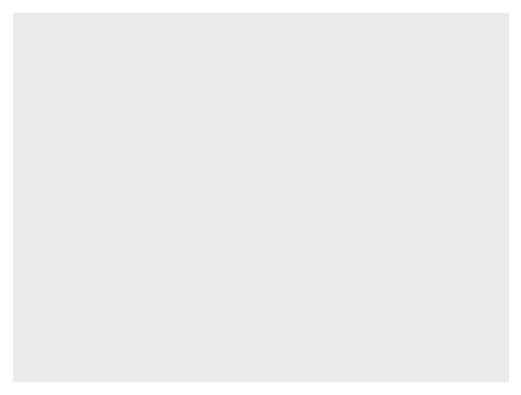

<ggplot: (8734006182257)>

In [7]:
ggplot(cars)

Next you define the mapping of your variables to perceivable aesthetics like the x position. This still does not draw any points, but already creates an axis label with appropriate limits.

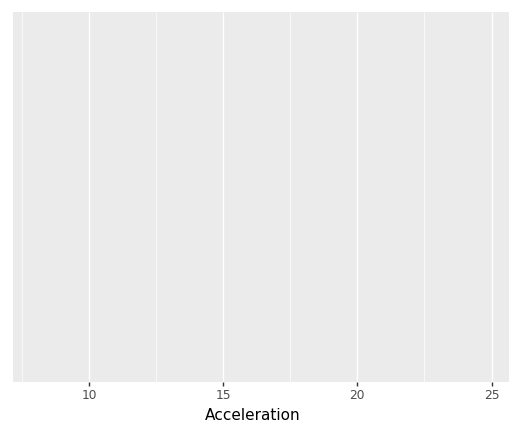

<ggplot: (-9223363302848593499)>

In [8]:
ggplot(cars, aes(x='Acceleration'))

The final part is to use some geometrical object, that gets calculated based on the mapping. `ggplot` does this by overriding the `+`-operator to add different `geoms` to the plot. Layer by layer. Once you understood this basic pattern, you have understood the *grammar of graphics*.

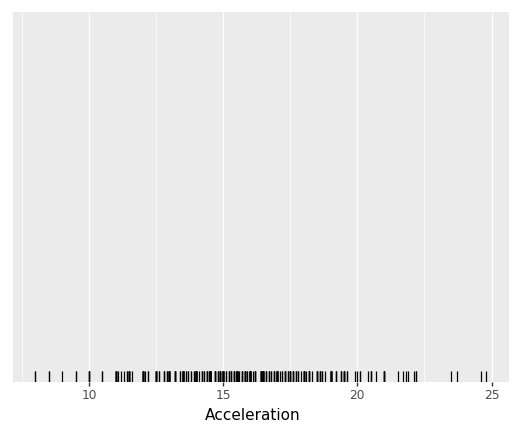

<ggplot: (-9223363302848613828)>

In [9]:
ggplot(cars, aes(x='Acceleration')) + geom_rug()

My recommandation for formating your `ggplot` code is to wrap the whole expresson in parantheses and then put each `geom` that you add on a separte line with the plus upfront. This way the code is very readable and you can simply comment out a single line to remove that layer from the plot, without touching the rest of the code.

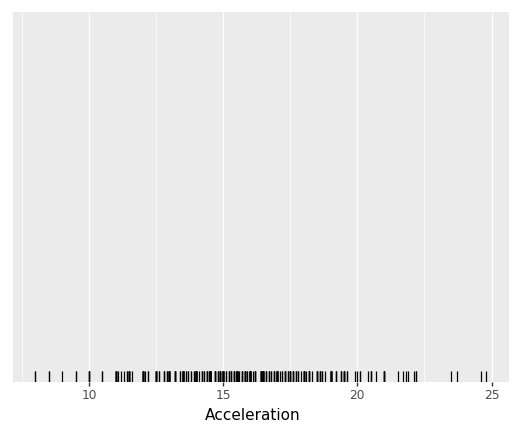

<ggplot: (-9223363302843349588)>

In [10]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_rug()
)

The power of the grammar of graphics is that you do not need to remember or search for a lot of configuration parameters of plotting functions. Instead, you can compose very complex plots out of simple expressions. For example, if you wanted to put the rug plot on the y-axis you can simply change the mapping.

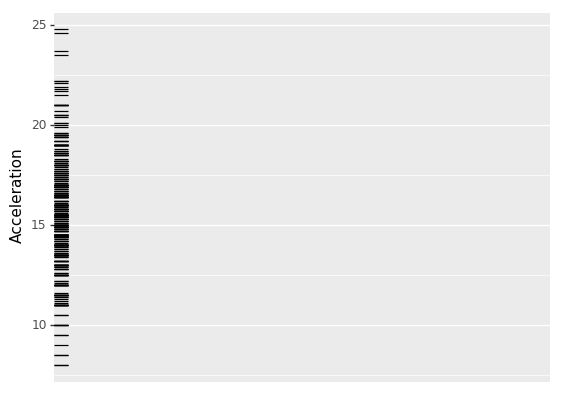

<ggplot: (8734005974620)>

In [11]:
(ggplot(cars, aes(y='Acceleration'))
 + geom_rug()
)

Several `geoms` can be added to create more complex plots.

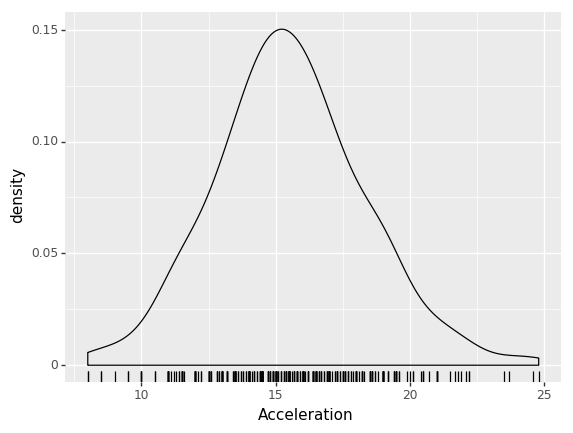

<ggplot: (-9223363302848785962)>

In [12]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_rug()
 + geom_density()
)

By default all added `geoms` will inherit the `aes` mapping of the plot. However, you can also override this by passing a new `aes` object. In practice this not so often needed though. 

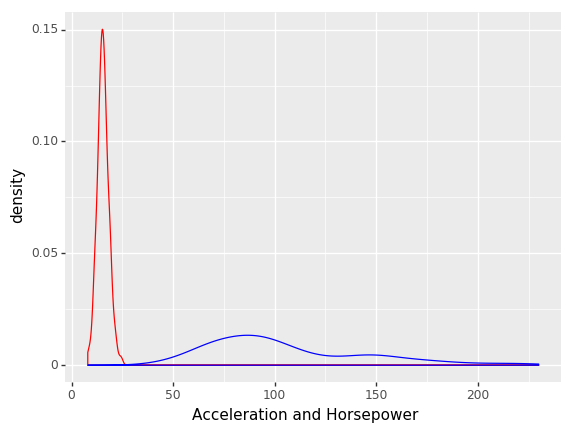

<ggplot: (8734005902726)>

In [13]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_density(color='red') # This geom uses Acceleration
 + geom_density(aes(x='Horsepower'), color='blue') # This geom uses Horsepower.
 + labs(x='Acceleration and Horsepower')
)

Now that we understood the basics of `gglot` let's dive into the dataset. First we look at the distribution of a single variable.

# Exploring a single variable

## Histograms

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


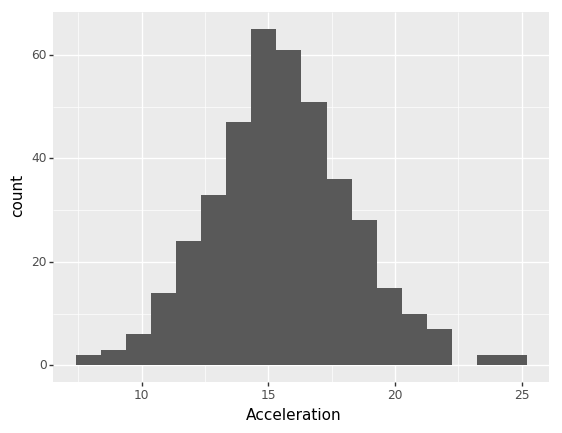

<ggplot: (8734005855629)>

In [14]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram()
)

Many geoms are just combinations of less complex geoms and stats. For example a histogram is just a bar plot with a binning statistic.

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


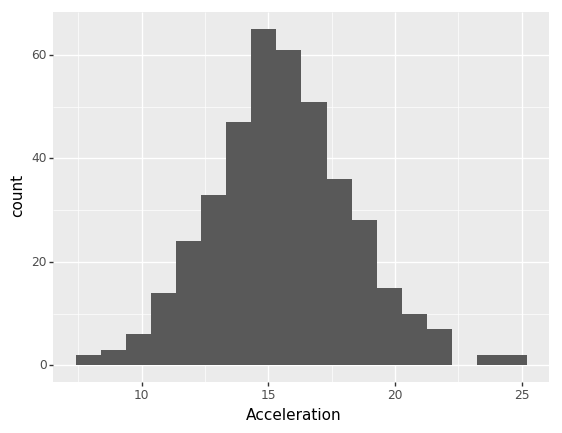

<ggplot: (-9223363302848873156)>

In [15]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_bar(stat=stat_bin())
)

All geoms can be customized with additional keyword arguments.

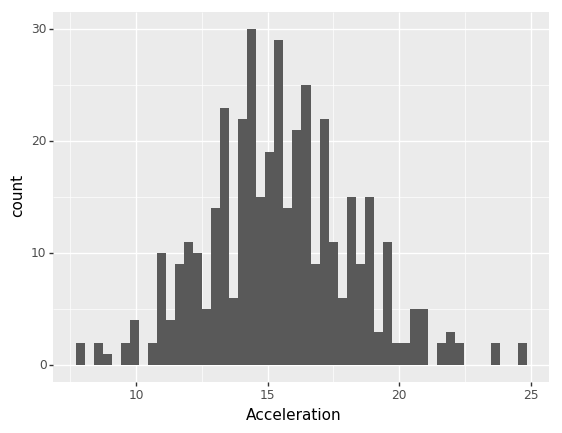

<ggplot: (-9223363302848966091)>

In [16]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram(bins=50)
)

If you want to access variables that are not directly available from the dataset, but rather get calculated by some stat, you can do so by wrapping the variable into `"stat()"`. This way we can get a normalized histogram.

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


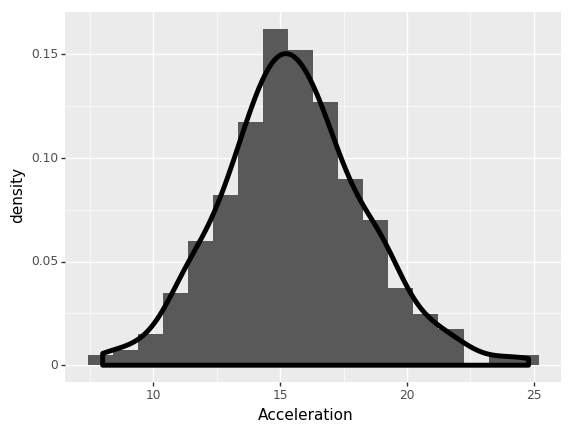

<ggplot: (-9223363302849012441)>

In [17]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram(aes(y='stat(density)'))
 + geom_density(size=2)
)

## Boxplots
For making a boxplot, we need to specify the x variable. If we want to make a boxplot for a single variable, we need to specify some number.

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


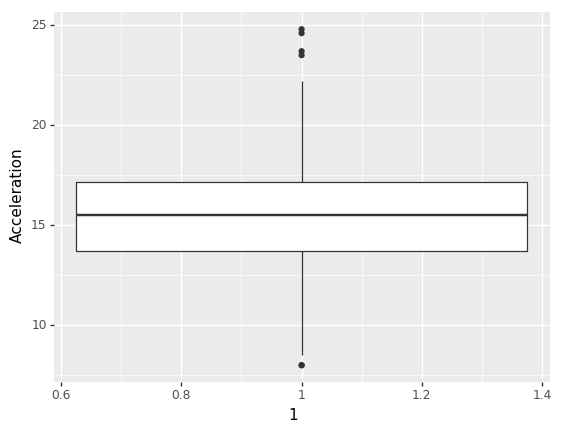

<ggplot: (-9223363302843349581)>

In [18]:
(ggplot(cars, aes(x=1, y='Acceleration')) 
 + geom_boxplot()
)

## Exercise
For the exercise we will turn to the `barley` dataset. The description on vega_datasets states

> The result of a 1930s agricultural experiment in Minnesota, this dataset contains yields for 10 different varieties of barley at six different sites. It was first published by agronomists F.R. Immer, H.K. Hayes, and L. Powers in the 1934 paper "Statistical Determination of Barley Varietal Adaption." R.A. Fisher's popularized its use in the field of statistics when he included it in his book "The Design of Experiments." Since then it has been used to demonstrate new statistical techniques, including the trellis charts developed by Richard Becker, William Cleveland and others in the 1990s.

In [19]:
barley = vega_datasets.data.barley()
barley.head()

,site,variety,year,yield
0,University Farm,Manchuria,1931,27.00000
1,Waseca,Manchuria,1931,48.86667
2,Morris,Manchuria,1931,27.43334
3,Crookston,Manchuria,1931,39.93333
4,Grand Rapids,Manchuria,1931,32.96667


In [20]:
count_down(1)

You have 1 minutes time for the exercise.


Make a histogram of the `yield` for all observations. Make the bins 5 units wide. 

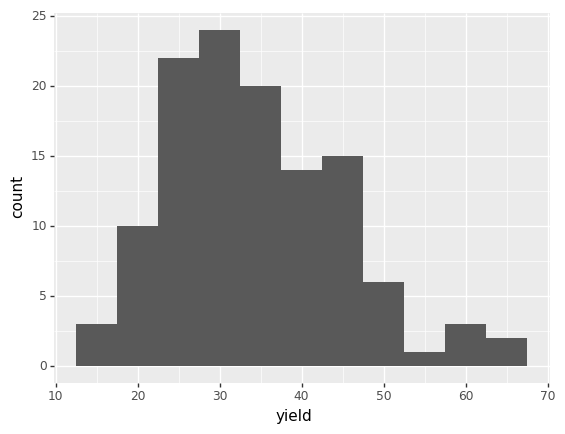

<ggplot: (8734005728625)>

In [21]:
(ggplot(barley, aes(x='yield')) 
 + geom_histogram(binwidth=5)
)

# Exploring the relation of one continuous and one categorical variable

It is common to split the boxplot by a categorical variable. This is where more of the ggplot magic comes into play. Under the hood, ggplot performs a `groupby` operation on the x variable, applies the boxplot computations on every group and combines the results into a single plot. 

## Boxplots

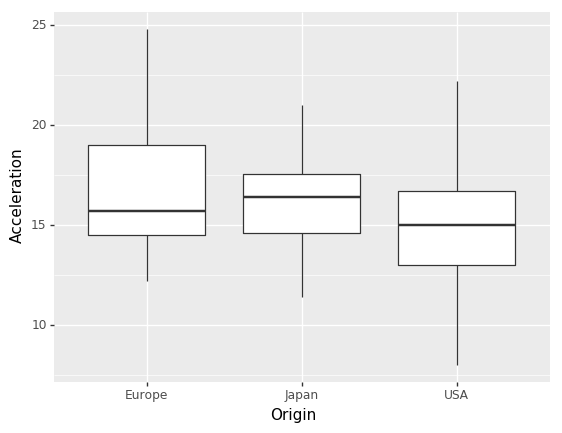

<ggplot: (8734005747930)>

In [22]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_boxplot()
)

Sometimes it can make sense to "jitter", i.e. to randomly disturb, the original data points and put them on top of the boxplots. This gives you a feeling for the amount and distribution of the original data.

## Jittering

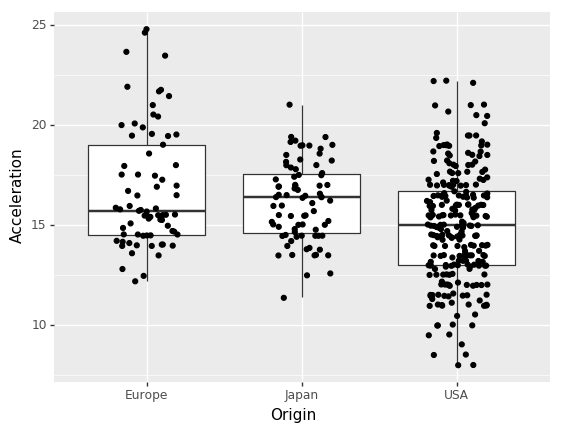

<ggplot: (8734005809917)>

In [23]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_boxplot()
 + geom_jitter(width=0.2)
)

## Violinplots
Violinplots are nice alternative to boxplots.

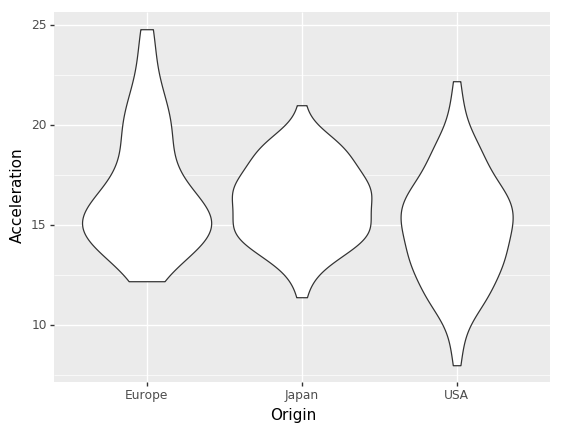

<ggplot: (8734005603420)>

In [24]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_violin()
)

Adding `stat_summary` gives more information by displaying mean and standard deviation. This also demonstrates that not just every `geom` is by default associated with some `stat`, but also every `stat` is by default associated with some `geom`.

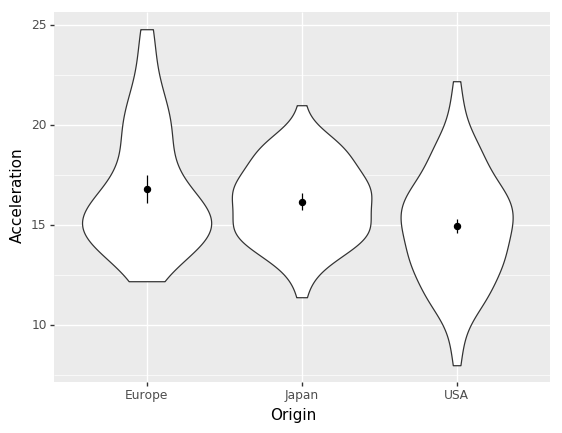

<ggplot: (-9223363302849189709)>

In [25]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_violin()
 + stat_summary()
)

Violinplots can be nicely combined with boxplots. This combines the strength of density estimation and point estimates, such as the median and quartiles.

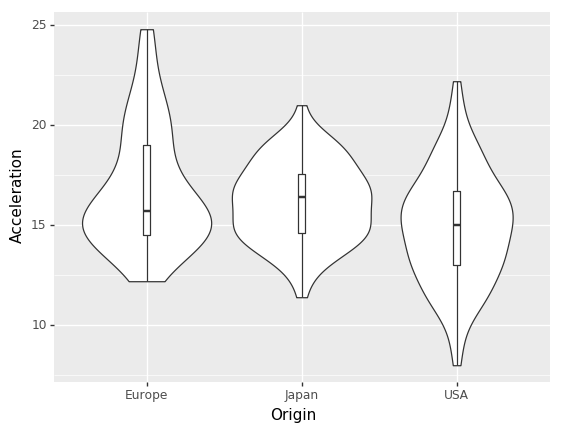

<ggplot: (8734005582379)>

In [26]:
(ggplot(cars, aes(x='Origin', y='Acceleration')) 
 + geom_violin()
 + geom_boxplot(width=0.05)
)

Just looking at density split by a categorical variable is alsow very helpful.

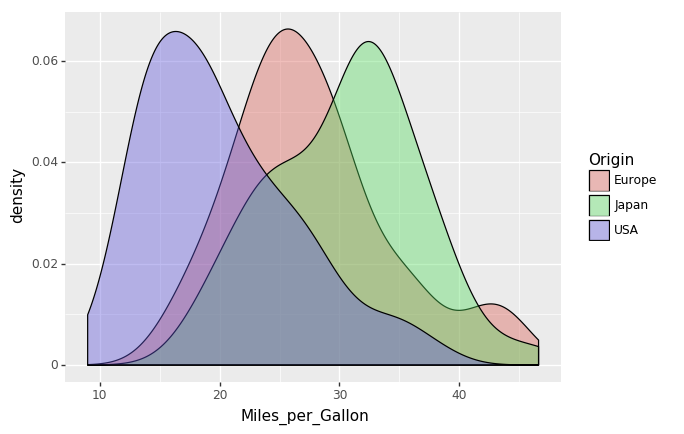

<ggplot: (8734005545364)>

In [27]:
(ggplot(cars, aes(x='Miles_per_Gallon', fill='Origin')) 
 + geom_density(alpha=0.4)
)

The same can be done with histograms.

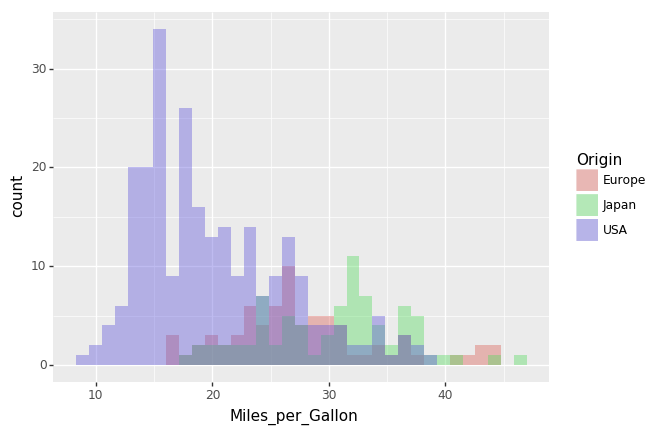

<ggplot: (-9223363302848985130)>

In [28]:
(ggplot(cars, aes(x='Miles_per_Gallon', fill='Origin')) 
 + geom_histogram(alpha=0.4, bins=35, position='identity')
)

Let's look at a comparision to matplotlib, to see how much code we save by using ggplot.

In [29]:
var_to_plot = 'Miles_per_Gallon'
var_to_split = 'Origin'
bins = np.histogram_bin_edges(cars[var_to_plot], bins=35)
fig, ax = plt.subplots(figsize=(12, 8))
for name, group in cars.groupby(var_to_split):
    ax.hist(var_to_plot, bins=bins, data=group, label=name, alpha=0.4)
ax.set(xlabel=var_to_plot, ylabel='count')
ax.legend(title=var_to_split)

NameError: name 'np' is not defined

We see that ggplot takes care of a lot of logic for us. The plot even looks a bit different, becaues ggplot does a few things under the hood to improve the placement of the bins.

## Exercise
For the exercise we get back to the barley dataset. Make a violinplot of the `yield` for each `site`. Jitter the original data points on top of the violins.  

In [30]:
count_down(3)

You have 3 minutes time for the exercise.


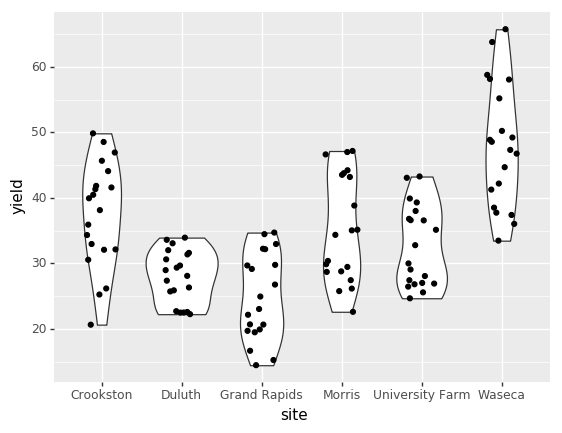

<ggplot: (8734005902768)>

In [31]:
(ggplot(barley, aes(x="site", y="yield"))
 + geom_violin()
 + geom_jitter(width=0.2)
)

# Exploring the relation of two continuous variables
Let's now explore the interaction of two continuous variables. A standard way of doing this is the scatter plot.

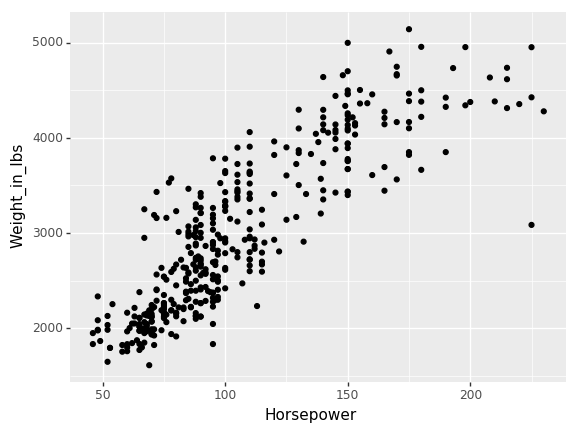

<ggplot: (8734005732402)>

In [32]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs')) 
 + geom_point()
)

Scatterplots sometimes suffer from *overplotting*. That means that points overlap with each other so we cannot distinguish them anymore. A `stat` that avoids this is a two dimensional kernel density estimate.

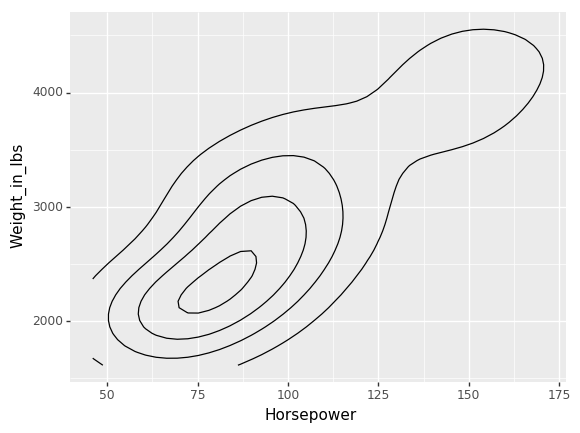

<ggplot: (-9223363302849070462)>

In [33]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs')) 
 + geom_density_2d()
)

Adding more levels makes the plot even better.

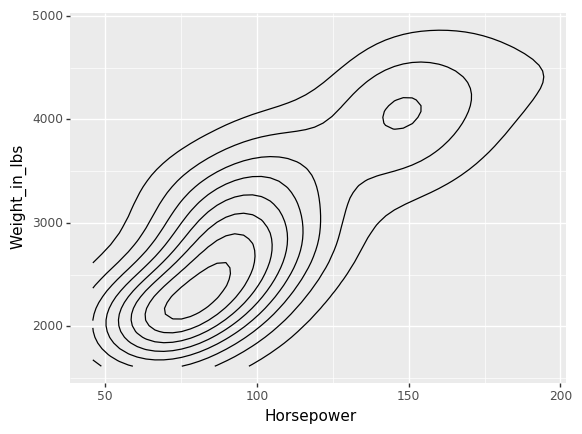

<ggplot: (-9223363302849129847)>

In [34]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs')) 
 + geom_density_2d(levels=10)
)

Again, using "stat()" is often helpful. We can for example add a colored filling to our density plot.

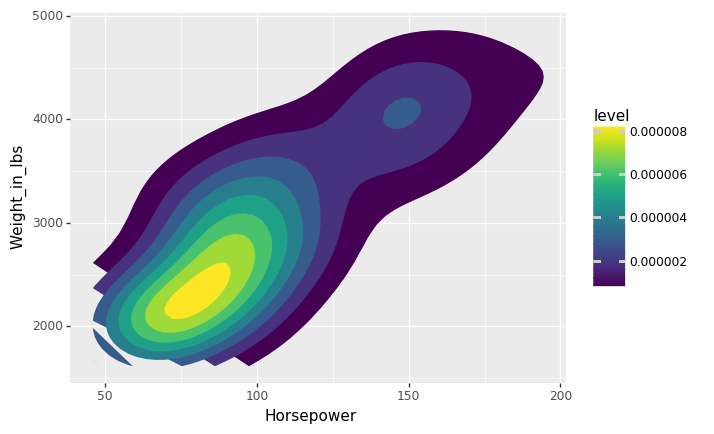

<ggplot: (8734005656829)>

In [35]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs')) 
 + stat_density_2d(geom='polygon', mapping=aes(fill='stat(level'), levels=10)
)

Another way of avoiding overplotting is to use a countplot.

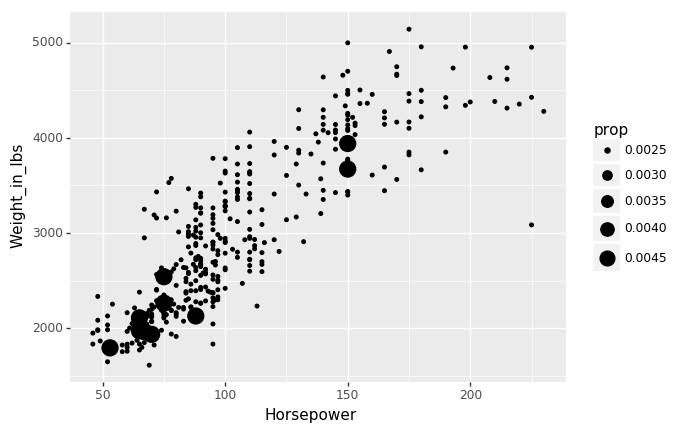

<ggplot: (-9223363302848894548)>

In [36]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs')) 
 + geom_count()
)

## Regression
With regression lines we can easily add more information to scatterplots. By default `geom_smooth` uses loess smoothing, i.e. [local regression](http://genomicsclass.github.io/book/pages/smoothing.html). In a nutshell, loess computes regression lines in a rolling window and then combines them into a smooth curve.

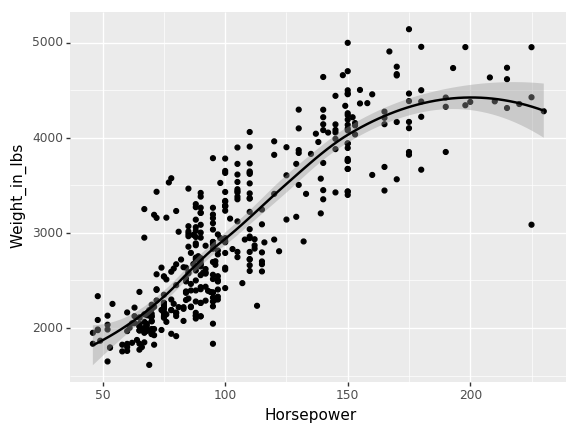

<ggplot: (-9223363302849106253)>

In [37]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs')) 
 + geom_point()
 + geom_smooth()
)

However, you can also use a simple *linear model* (lm). This also gives a confidence band for the standard error.

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


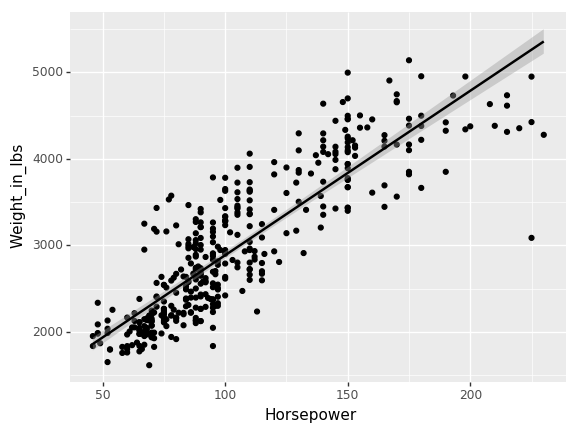

<ggplot: (8734004883208)>

In [38]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs')) 
 + geom_point()
 + geom_smooth(method='lm')
)

The model is fit for each group when we split the data by another variable.

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


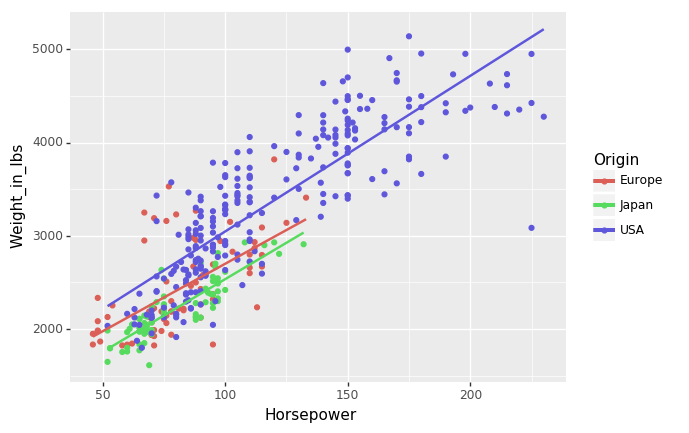

<ggplot: (8734004855023)>

In [39]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Origin')) 
 + geom_point()
 + geom_smooth(method='lm', se=False)
)

## Plots with text
Points can be labeled using `geom_text`. For extra annotations, that is not directly bound to data you should use `annotate` instead.

In [40]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


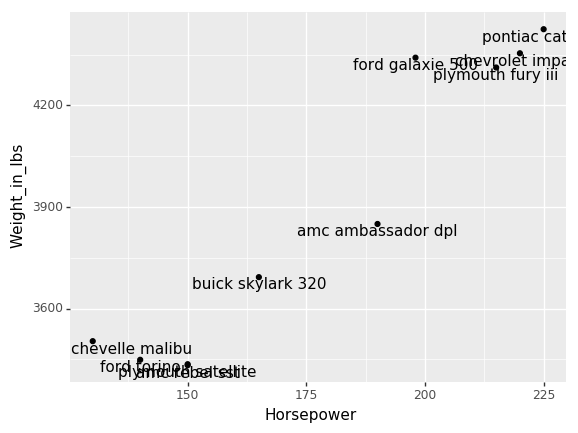

<ggplot: (8734005659726)>

In [41]:
(ggplot(cars.iloc[:10], aes(x='Horsepower', y='Weight_in_lbs', label='Name')) 
 + geom_point()
 + geom_text(va='top')
)

## Exercise
For the next exercise, we will take a look at the `countries` dataset that contains developmental indices for many countries of the world. Plot `Literacy` vs. `GDP` and fit a loess smoothed curve through the points. How do the variables relate? 

In [42]:
countries = pd.read_csv("data/countries.csv", index_col=0)
countries.head()

,Country,Subcontinent,Region,In EU,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,West & Central Asia,ASIA (EX. NEAR EAST),False,31056997,1.677019e+06,47.96,0.00,23.06,163.07,...,3.22,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,Europe,EASTERN EUROPE,False,3581655,7.445703e+04,124.59,1.26,-4.93,21.52,...,71.20,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,North Africa,NORTHERN AFRICA,False,32930091,6.168683e+06,13.83,0.04,-0.39,31.00,...,78.10,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,Oceania,OCEANIA,False,57794,5.154080e+02,290.42,58.29,-20.71,9.27,...,259.54,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,Europe,WESTERN EUROPE,False,71201,1.212115e+03,152.14,0.00,6.60,4.05,...,497.18,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [43]:
count_down(3)

You have 3 minutes time for the exercise.


/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 18 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


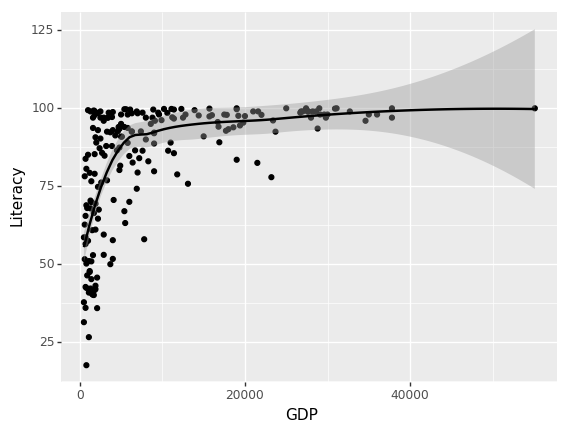

<ggplot: (8734005677597)>

In [44]:
(ggplot(countries, aes(x="GDP", y="Literacy"))
 + geom_point()
 + geom_smooth()
)

# More dimensions with more aesthetics
In fact we can combine quite a few more then just two variables on a two dimensional plot.

In [45]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


We can add one more continuous variable, by mapping it to a color scale.

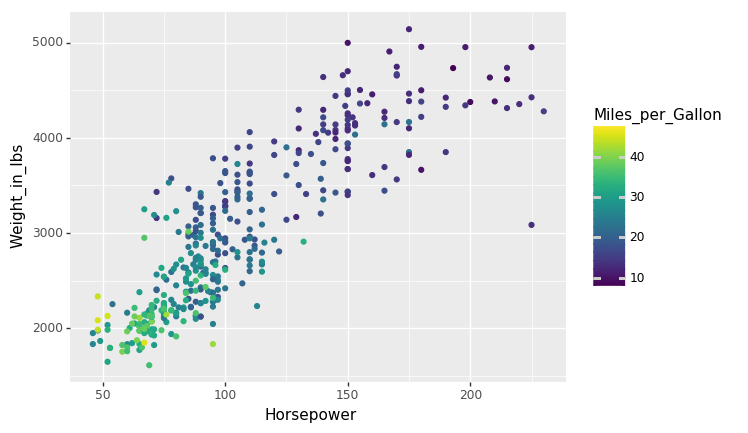

<ggplot: (8734005745265)>

In [46]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Miles_per_Gallon')) 
 + geom_point()
)

We can add another continuous variable, by making the size of the markers proportional to its value. In this case we are showing the "Displacement" (Hubraum) which is the swept volume of all the pistons inside the cylinders of the engine.

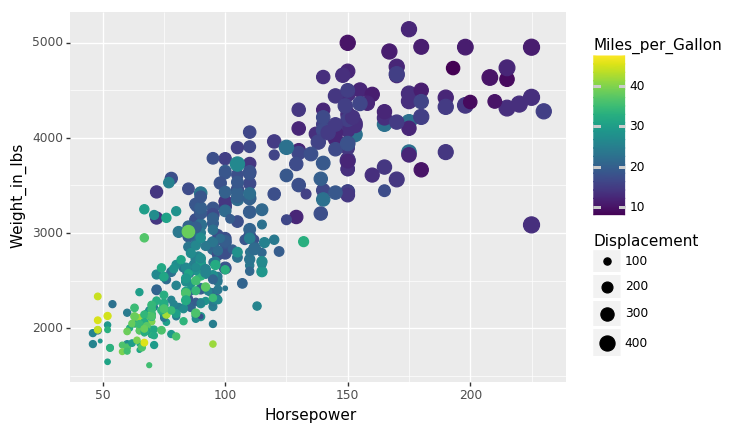

<ggplot: (-9223363302848593457)>

In [47]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Miles_per_Gallon', size='Displacement')) 
 + geom_point()
)

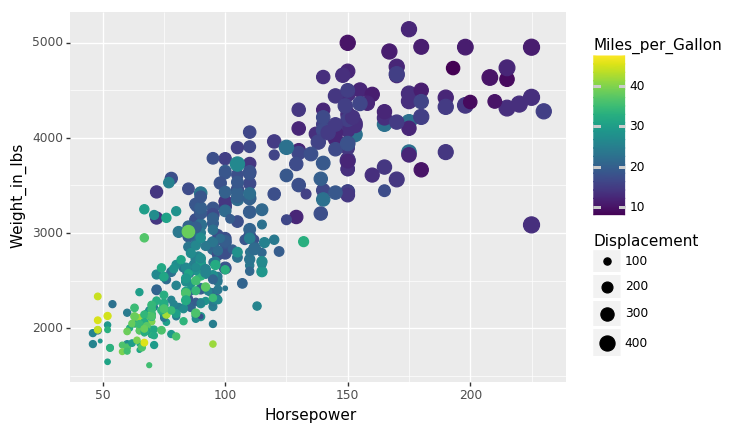

<ggplot: (8734004879210)>

In [48]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Miles_per_Gallon', size='Displacement')) 
 + geom_point()
)

We can add another categorical variable by binding it to the `shape` aesthetic. This way we now have five different variables in our 2d plot. 

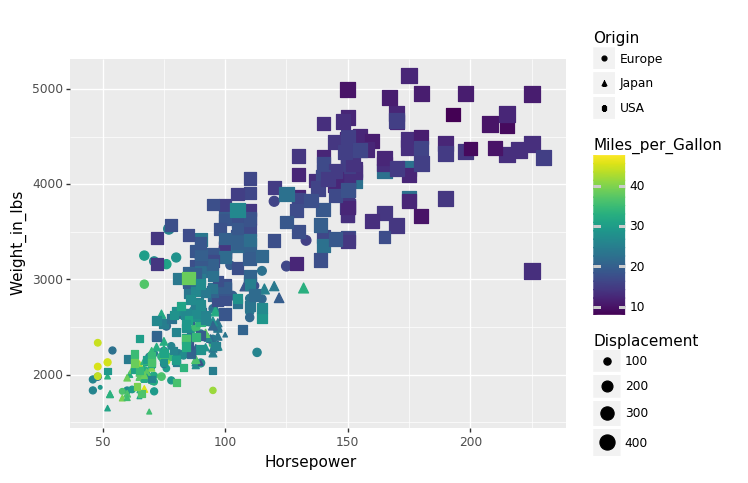

<ggplot: (-9223363302849127329)>

In [49]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Miles_per_Gallon', size='Displacement', shape='Origin')) 
 + geom_point()
)

## Exercise
Let's again take a look at the `countries` dataset. Enrich the plot from above (`Literacy` vs. `GDP`) with information about the population density, the counties' climate and whether or not the countries are part of the European Union. Try to find mappings that make the plot interpretable! *Note:* To keep things somewhat clear, remove the regression from the plot. 

In [50]:
count_down(5)

You have 5 minutes time for the exercise.


/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 18 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


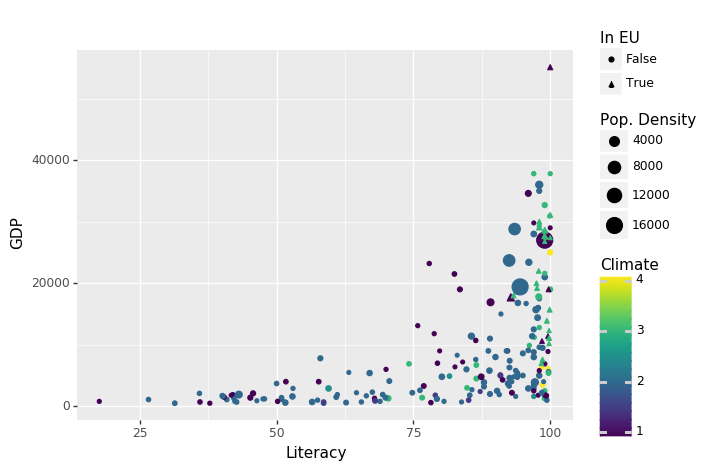

<ggplot: (8734005648637)>

In [51]:
(ggplot(countries, aes(y="GDP", x="Literacy", size="Pop. Density", color="Climate", shape="In EU"))
 + geom_point()
)

# Even more dimensions with facets
Can we go even further? Faceting is a technique that repeats the same kind of plot, grouped by variables. It also makes sure that all the axis have the same extent, so the plots are comparable.

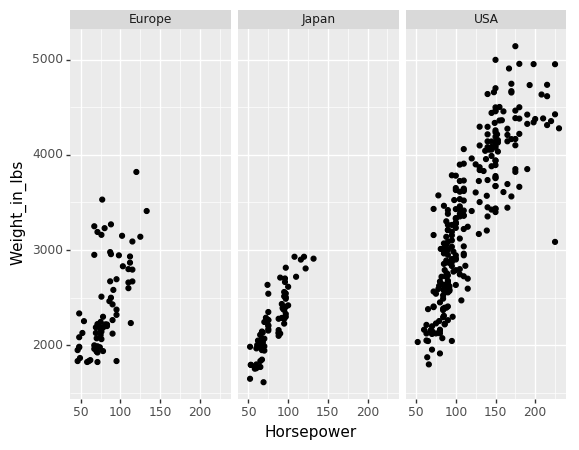

<ggplot: (-9223363302848791229)>

In [52]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs')) 
 + geom_point()
 + facet_wrap('Origin')
)

Coming back to our previous example, we can add the `Cylinders` variable. `facet_wrap` just puts all the plots next to one another, wrapping after a fixed number of columns.

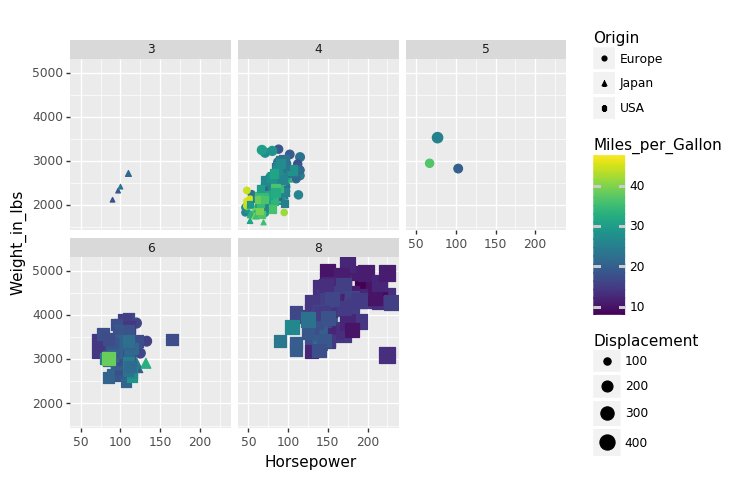

<ggplot: (8733996509297)>

In [53]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Miles_per_Gallon', size='Displacement', shape='Origin')) 
 + geom_point()
 + facet_wrap('Cylinders')
)

We can customize the way the wrapping is done, for example by specifying the number of columns.

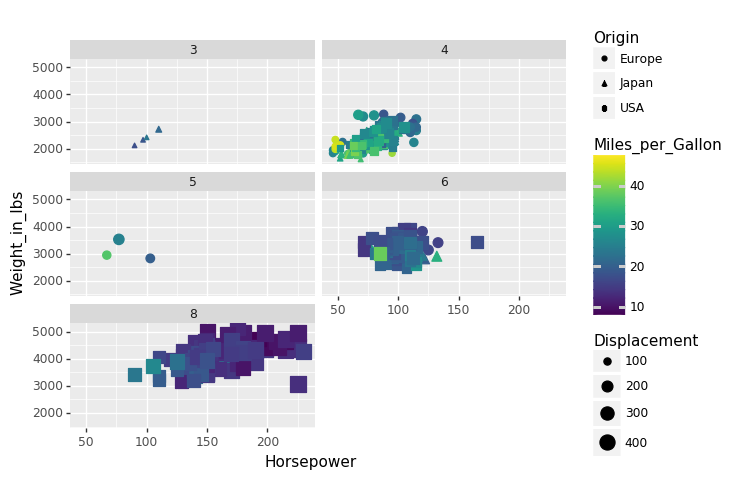

<ggplot: (8734005648497)>

In [54]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Miles_per_Gallon', size='Displacement', shape='Origin')) 
 + geom_point()
 + facet_wrap('Cylinders', ncol=2)
)

In contrast to `facet_wrap`, `facet_grid` explicitly maps variables to rows and columns. Let's convert the `Year` to an `int` so it can be included in the grid.

In [55]:
cars['year_int'] = cars['Year'].dt.year
cars['year_int'].value_counts()

1982    61
1973    40
1978    36
1970    35
1976    34
1975    30
1980    29
1979    29
1971    29
1977    28
1972    28
1974    27
Name: year_int, dtype: int64

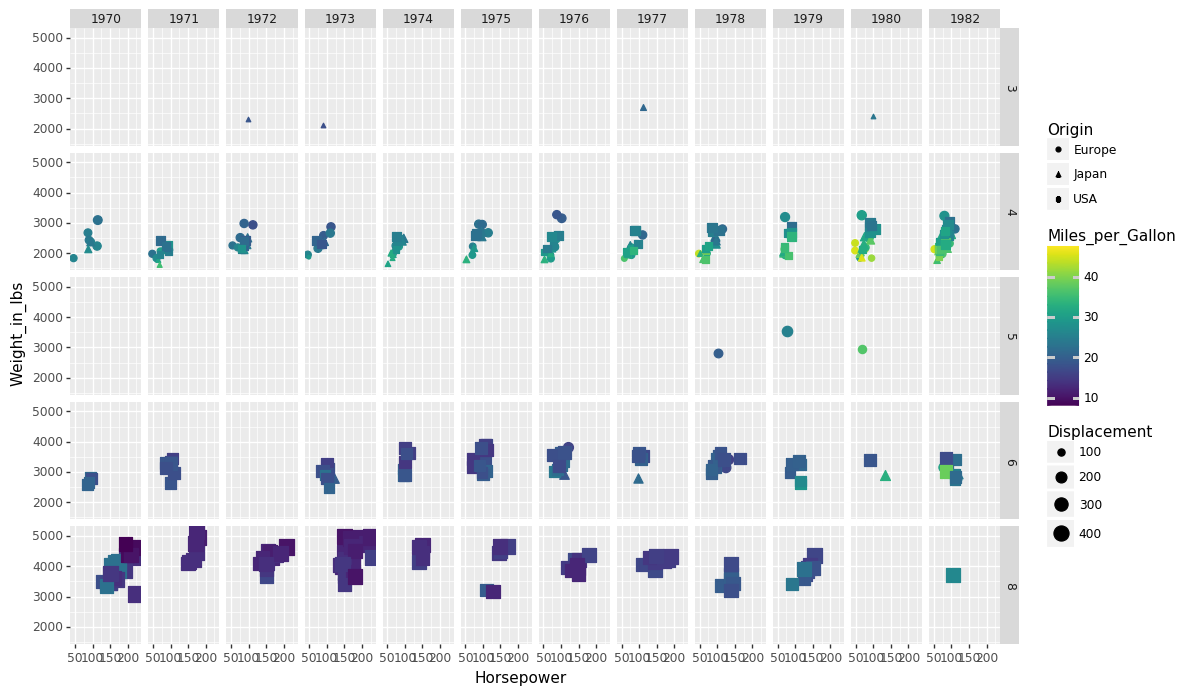

<ggplot: (-9223363302848841286)>

In [56]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Miles_per_Gallon', size='Displacement', shape='Origin')) 
 + geom_point()
 + facet_grid(['Cylinders', 'year_int'])
 + theme(figure_size=(12, 8))
)

In [57]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,year_int
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01,1970
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01,1970
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01,1970
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01,1970
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01,1970


Looking at the dataframe, we have almost included all variables in our plot except for `Name` and `Acceleration`. Since putting text labels to points does not make so much sense on this scale, we just add the `Acceleration` variable to the plot. To do this, we first have to turn in into a categorical variable.

In [58]:
cars['Acceleration'].describe()

count    406.000000
mean      15.519704
std        2.803359
min        8.000000
25%       13.700000
50%       15.500000
75%       17.175000
max       24.800000
Name: Acceleration, dtype: float64

In [59]:
cars['acceleration_cat'] = pd.qcut(cars['Acceleration'], q=3, labels=['slow', 'middle', 'fast'])
cars['acceleration_cat'].head()

0    slow
1    slow
2    slow
3    slow
4    slow
Name: acceleration_cat, dtype: category
Categories (3, object): [slow < middle < fast]

Now we can extend one side of the facet grid with a combination of two variables. We can do that with a so called *formular expression*. The `~` separates rows from columns. With `+` we can create a crossproduct of variabes.

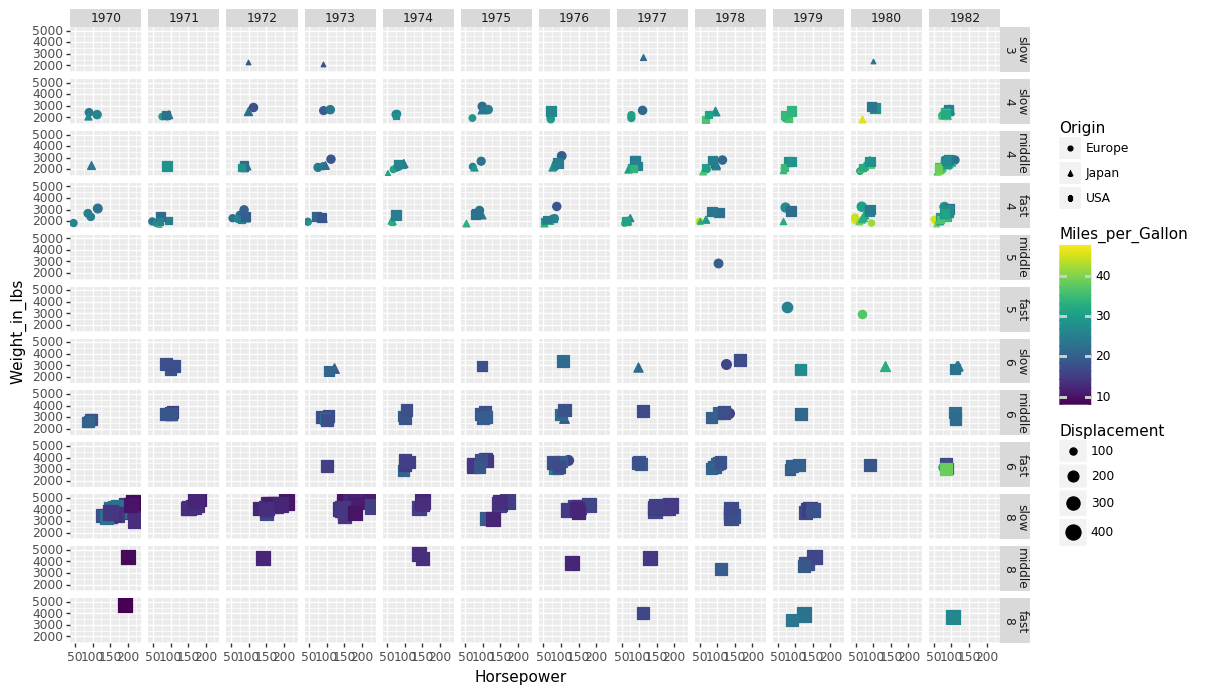

<ggplot: (8734004929200)>

In [60]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Miles_per_Gallon', size='Displacement', shape='Origin')) 
 + geom_point()
 + facet_grid('Cylinders + acceleration_cat ~ year_int')
 + theme(figure_size=(12, 8))
)

Using formulars is the standard `R` way of doing things. In Python we can also just use a nested list.

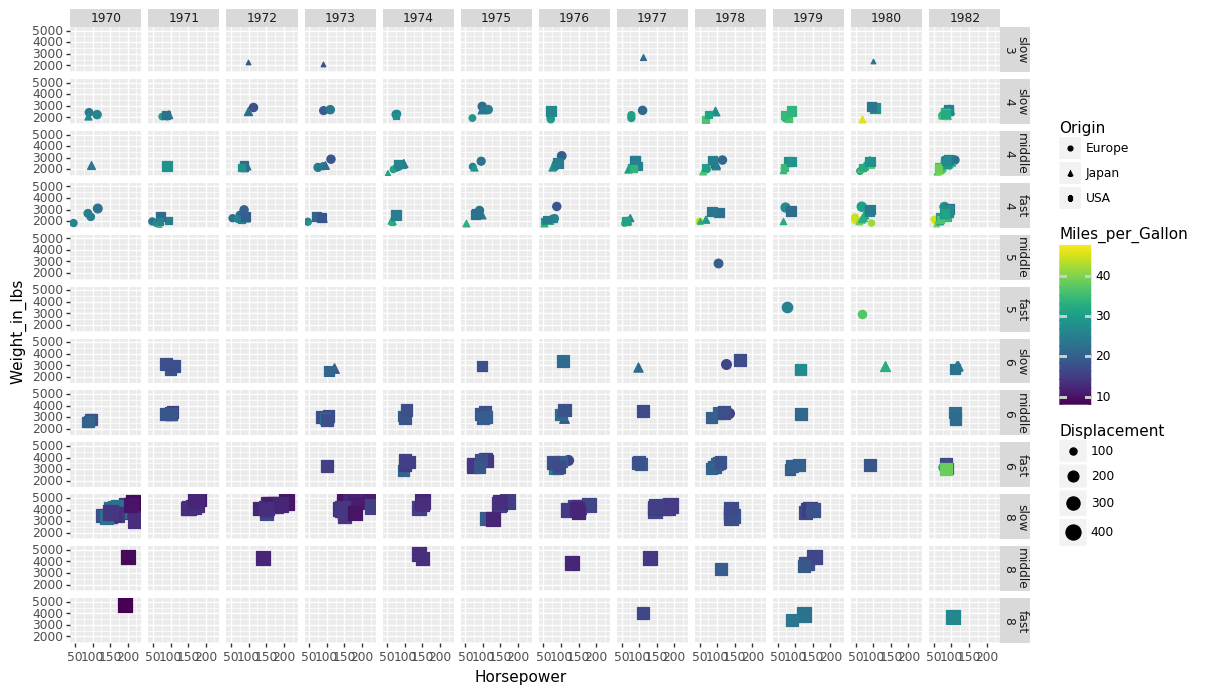

<ggplot: (8733960815936)>

In [61]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs', color='Miles_per_Gallon', size='Displacement', shape='Origin')) 
 + geom_point()
 + facet_grid([['Cylinders', 'acceleration_cat' ], 'year_int'])
 + theme(figure_size=(12, 8))
)

That's it! We combined eight variables in a single plot using only four lines of code!

## Exercise
Let's turn back to the `barley` dataset. Make a boxplot for the two years of the experiment each. Facet the plot by `site`.

In [62]:
count_down(3)

You have 3 minutes time for the exercise.


When simply assigning `year` to the `x` aesthetic we see that `year` is interpreted as a continous variable. To avoid this, we can either convert `year` to a categorical variable or wrap the assignment in `factor(year)` expression. The latter way comes from `R`'s ggplot.

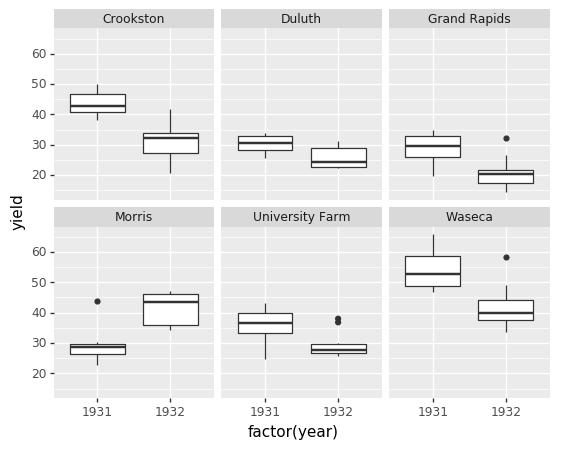

<ggplot: (8733961820834)>

In [63]:
(ggplot(barley, aes(x="factor(year)", y="yield"))
+ geom_boxplot()
+ facet_wrap("site")
)

Now it is time to show you the killer feature of ggplot that will get your paper published for sure!

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


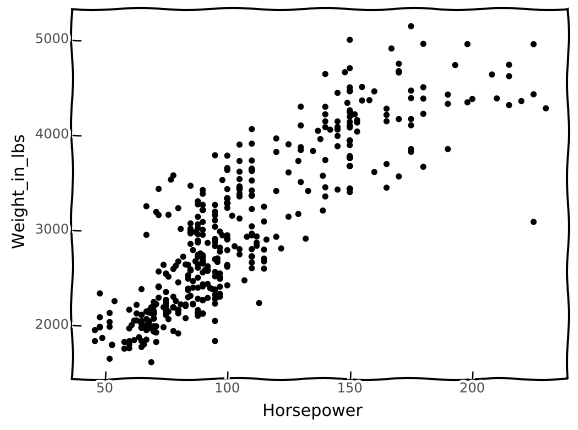

<ggplot: (8733961961669)>

In [64]:
(ggplot(cars, aes(x='Horsepower', y='Weight_in_lbs')) 
 + geom_point()
 + theme_xkcd()
)

Admittedly, this is rather a feature of `matplotlib` than of `ggplot`. It is available through `with plt.xkcd()`.

# Further Readings
A nice collection of R ggplot examples with good explanantions when to use them can be found under http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html. As ggplot is very popular in the R community, it is usually good advise to look for R examples as most examples transfer to Python version with minor modifications.

You can read the original ggplot paper at https://vita.had.co.nz/papers/layered-grammar.html. It talks about design decisions of ggplot in more detail and compares it to the original grammar developed by Wilkinson.

# Seaborn
In contrast to `ggplot`, `seaborn` abstracts commonly used plots in functions that can be customized with arguments. In principle, seaborn should give you most of the functionality that ggplot gives you. 

We import seaborn under its common abbreviation `sns`. With `sns.set` we can change the styling and behavior of the plots. Calling it without arguments just activates the defaults. One strenght of seaborn is its very nice styling.

In [65]:
import seaborn as sns
sns.set()

Let's reset our dataset to its original form.

In [66]:
import vega_datasets
cars = vega_datasets.data.cars()
cars = cars.fillna(cars.median())
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


We can now make a scatterplot matrix of all numeric variables with a single function call. 

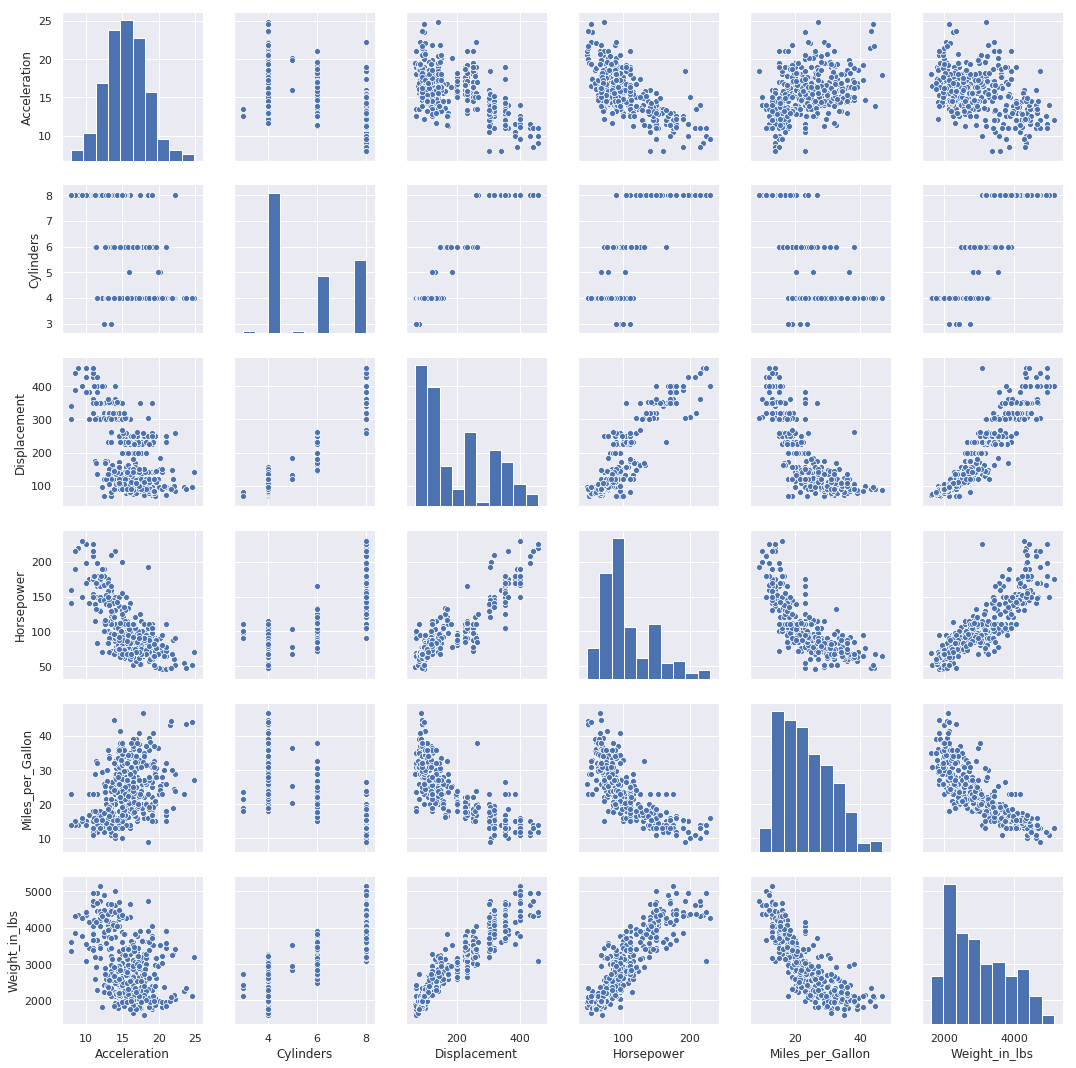

In [67]:
sns.pairplot(cars)

Seaborn also has the idea of aestheitc mappings. However, they are realized with keyword arguments that you pass to the functions and not with a separate `aes` object.

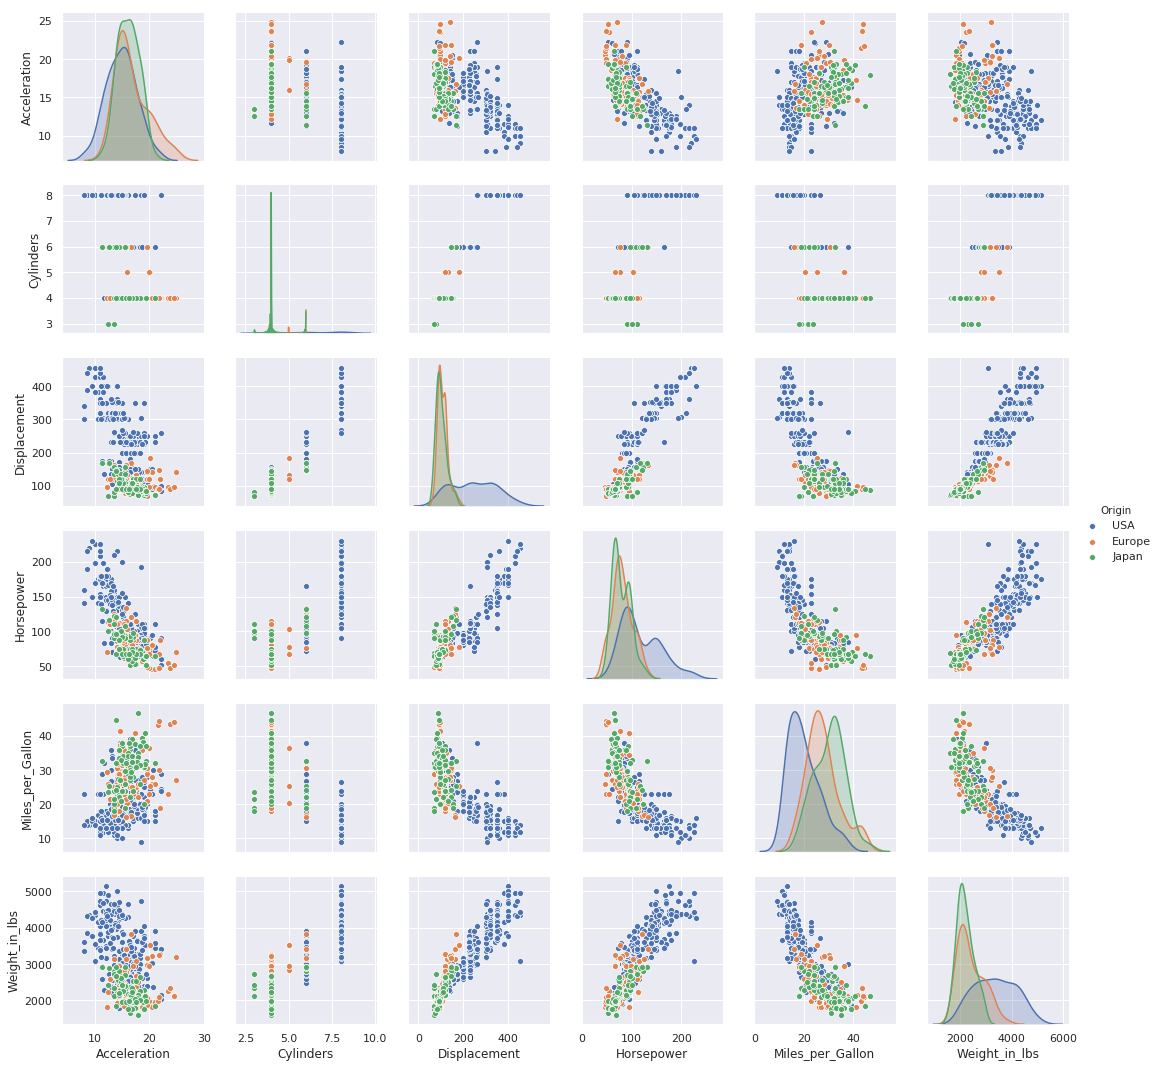

In [68]:
sns.pairplot(cars, hue='Origin')

## Exploring a single variable

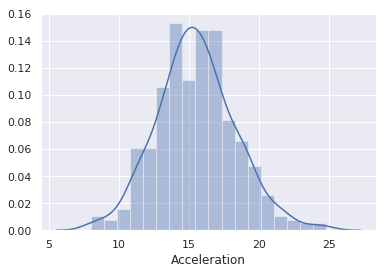

In [69]:
sns.distplot(cars['Acceleration'])

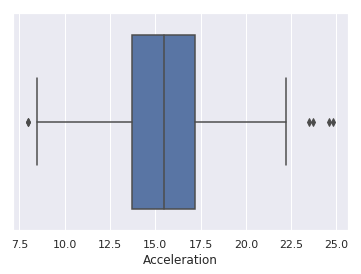

In [70]:
sns.boxplot('Acceleration', data=cars)

## Exploring the relation of one continuous and one categorical variable


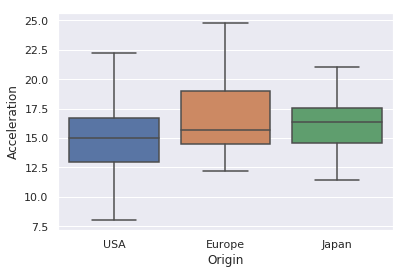

In [71]:
sns.boxplot(x='Origin', y='Acceleration', data=cars)

A nice alternative to `jitter` that is right now not included in Python's ggplot is the swarmplot. It also plots the original datapoints, but stacks similar datapoints side by side. This way we can get an impression of both data frequency and density.

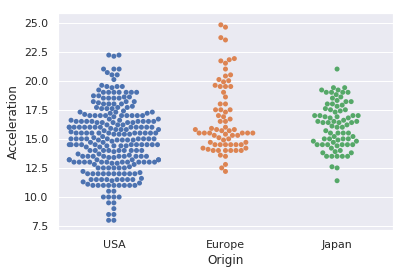

In [72]:
sns.swarmplot(x='Origin', y='Acceleration', data=cars)

Multiple plots can be combined by calling function after another. This is not as convenient as in ggplot, as the aesthetic mapping and the data binding has to be specified again.

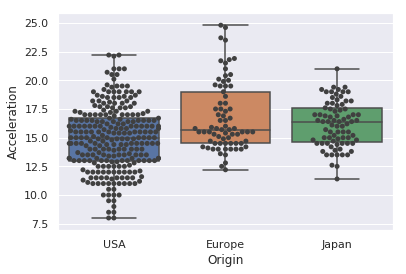

In [73]:
sns.boxplot(x='Origin', y='Acceleration', data=cars)
sns.swarmplot(x='Origin', y='Acceleration', color='0.25', data=cars)

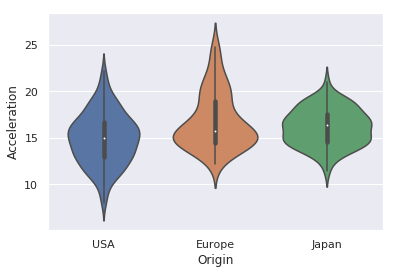

In [74]:
sns.violinplot(y='Acceleration', x='Origin', data=cars)

Let's create a binary variable, to demonstrate a nice twist for vioinplots.

In [75]:
cars['age'] = pd.cut(cars['Year'], bins=2, labels=['old', 'young'])

Using `split=True` each violing will show a different density, determined by the binary variable.

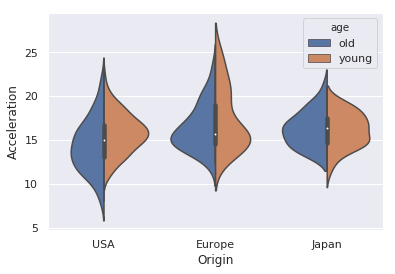

In [76]:
sns.violinplot(y='Acceleration', x='Origin', hue='age', split=True, data=cars)

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


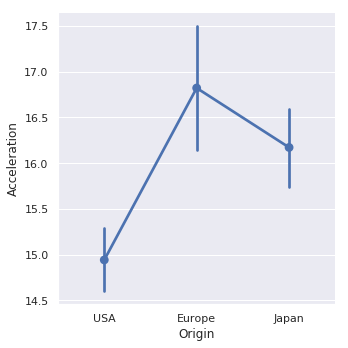

In [77]:
sns.factorplot(y='Acceleration', x='Origin', data=cars)

## Exploring the relation of two continuous variables

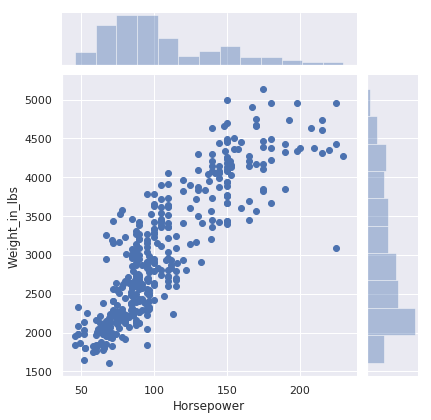

In [78]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', data=cars)

A "hexbin" plot is a kind of two dimensional histogram. Another way to avoid overplotting...

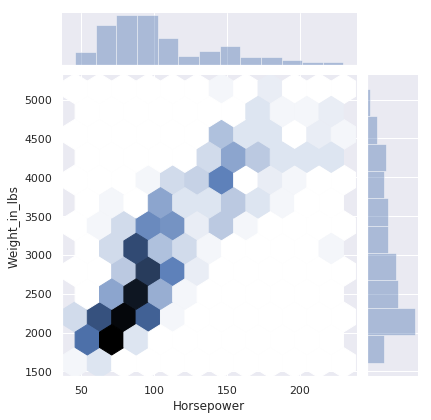

In [79]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', kind='hex', data=cars)

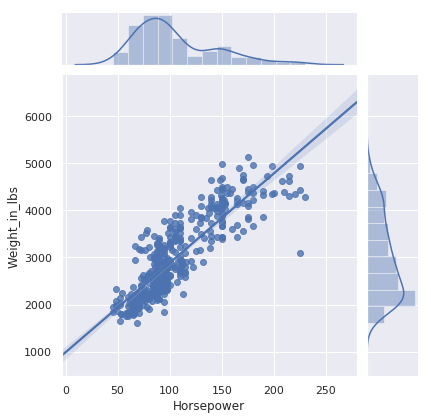

In [80]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', kind='reg', data=cars)

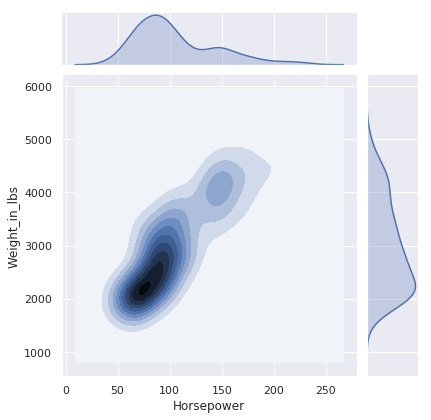

In [81]:
sns.jointplot(x='Horsepower', y='Weight_in_lbs', kind='kde', data=cars)

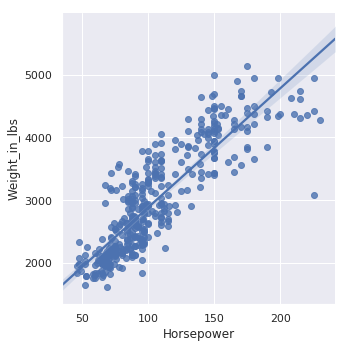

In [82]:
sns.lmplot(x='Horsepower', y='Weight_in_lbs', data=cars)

Many types of plots support faceting via the `col` or `row` argument.

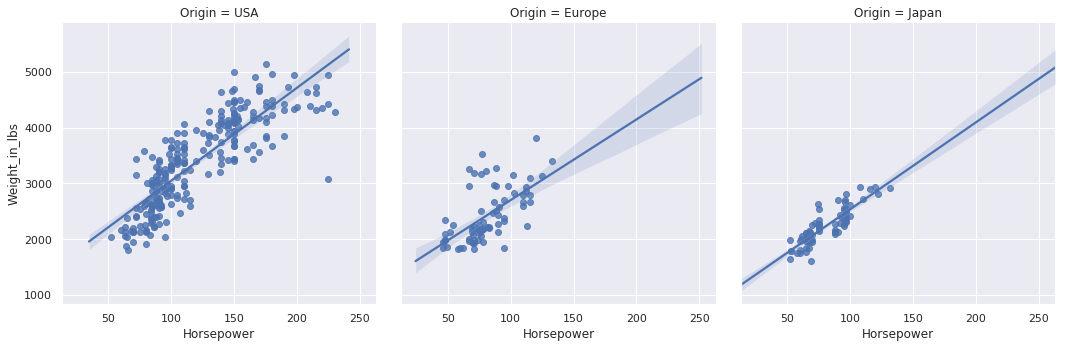

In [83]:
sns.lmplot(x='Horsepower', y='Weight_in_lbs', col='Origin', data=cars)

More complex facet plot can be created by first creating a `FacetGrid` object and then mapping a plotting function to each subplot. Yet we cannot really recreate our eight dimension plot that we made with `ggplot`, as `seaborn` does not support mapping variable to size and shape. Also only categorical variables can be mapped to color.

In [84]:
cars['year_int'] = cars['Year'].dt.year

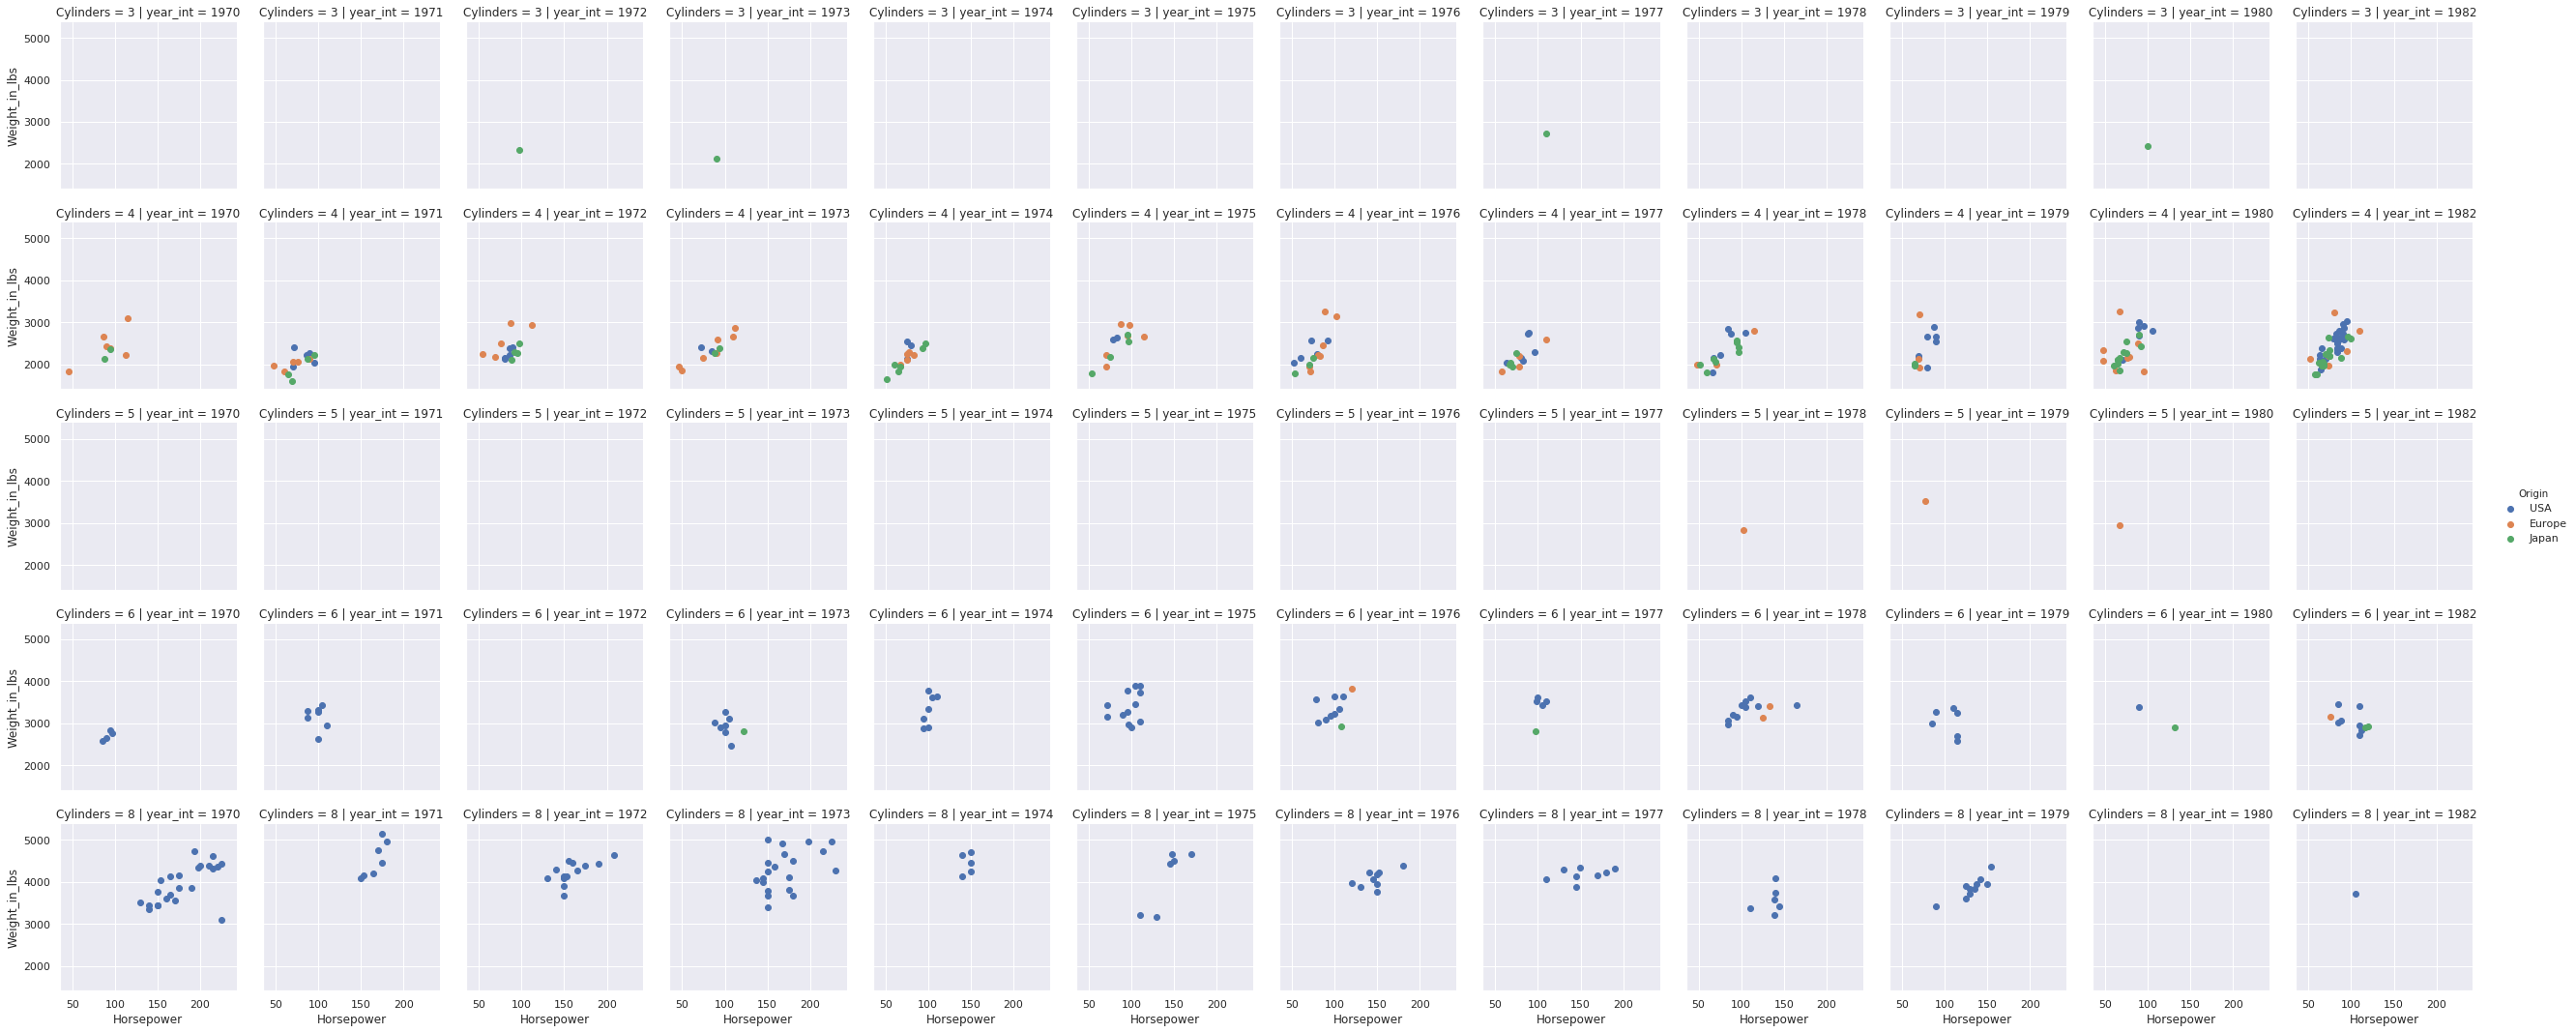

In [85]:
g = sns.FacetGrid(cars, row='Cylinders', col='year_int', hue='Origin')
g = g.map(plt.scatter, 'Horsepower', 'Weight_in_lbs')
g.add_legend()


## Exercise
Make a violinplot for each `variety` in the `barley` dataset. Split the boxplot by color for the two years.

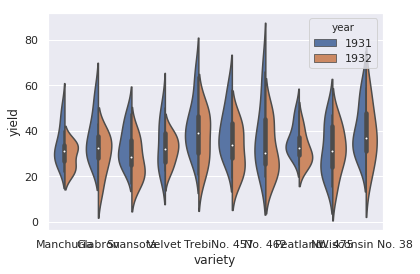

In [86]:
sns.violinplot(x="variety", y="yield", hue="year", split=True, data=barley)

# Customization with matplotlib
As both `seaborn` and `plotnine` use matplotlib to render the plots we can use all the matplotlib methods that we know and love to customize our plots.

## Customization for seaborn
In `seaborn` most functions just return a standard matplotib `Axes` object.

<class 'matplotlib.axes._subplots.AxesSubplot'>


[Text(0.5, 1.0, 'Distribution')]

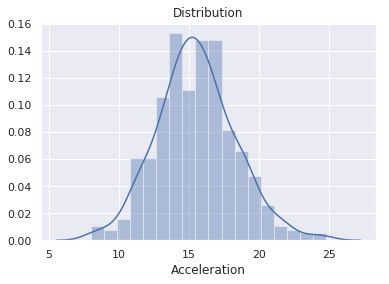

In [87]:
plot = sns.distplot(cars['Acceleration'])
print(type(plot))
plot.set(title='Distribution')

Alternatively, we can pass an `Axes` to plot on.

[Text(0.5, 1.0, 'Distribution')]

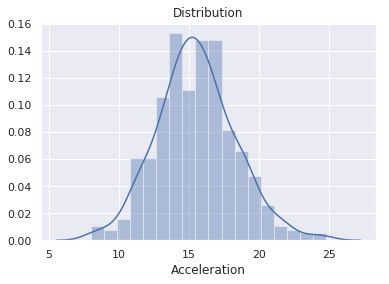

In [88]:
fig, ax = plt.subplots()
sns.distplot(cars['Acceleration'], ax=ax)
ax.set(title='Distribution')

## Customization for ggplot
With `ggplot` we have to call the `draw` method to obtain a reference to the matplotlib `figure`.

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


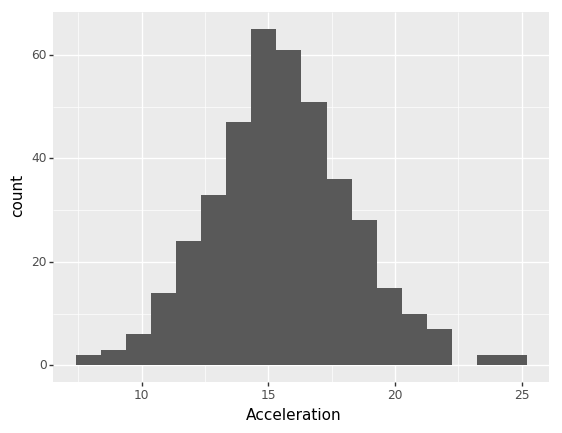

In [89]:
fig = (ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram()
).draw()

In [90]:
type(fig)

matplotlib.figure.Figure

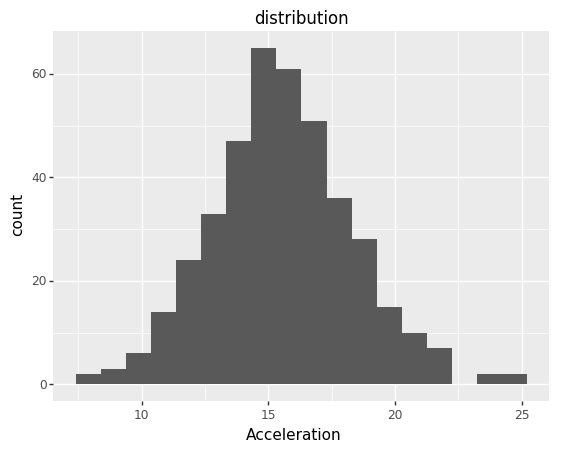

In [91]:
fig.axes[0].set(title='distribution')
fig

The same could be accomplished with *method chaining*.

/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


[Text(0.5, 1.0, 'distribution')]

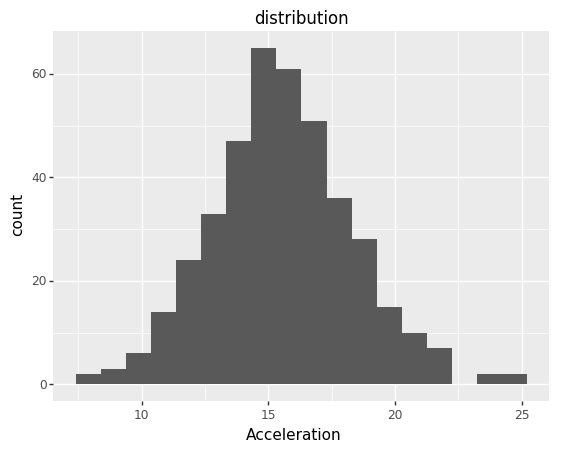

In [92]:
(ggplot(cars, aes(x='Acceleration')) 
 + geom_histogram()
).draw().axes[0].set(title='distribution')

## Exercise
Our first attempt at a violinplot with seaborn looked ok, but the x-ticklabels were overlapping. Let's fix this by passing using the power of matplotlib. Pass an `axes` to the seaborn function. Then rotate the x-ticklabels. You can use the following code to achieve the rotation

    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")

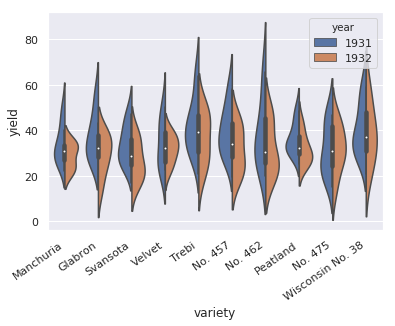

In [93]:
fig, ax = plt.subplots()
sns.violinplot(x="variety", y="yield", hue="year", split=True, data=barley, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right");

# Further Readings
Jake VanderPlas talking about all of Python's plotting libraries that you might ever want to use. (https://youtu.be/FytuB8nFHPQ)

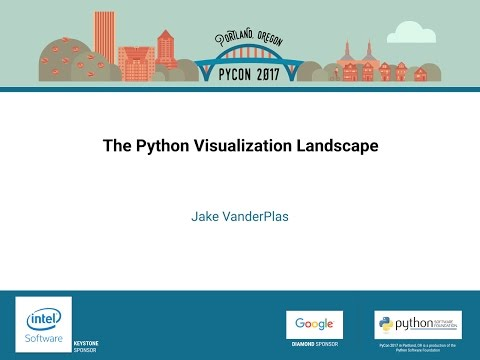

In [94]:
from IPython.display import YouTubeVideo
YouTubeVideo('FytuB8nFHPQ')

A tutorial on exploratory data analysis using pandas, matplotlib and seaborn. (https://youtu.be/KvZ2KSxlWBY)

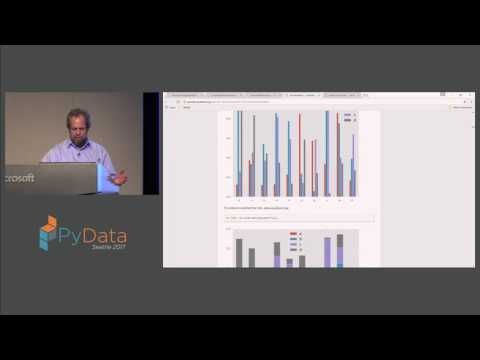

In [95]:
YouTubeVideo('KvZ2KSxlWBY')